<a href="https://colab.research.google.com/github/SeongwonTak/Data_Practices/blob/master/LinearReg_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀 연습
Linear Regression 간단한 문제 및 전처리 과정의 복습을 위해 간단한 데이터를 다뤄보며 선형 회귀 과정을 복습하고자 한다.

Kaggle에 있는 간단한 부동산 데이터를 통해
선형회귀를 복습한다.

## 데이터 탐색 및 전처리
data는 다음을 사용하려고 한다.
https://www.kaggle.com/quantbruce/real-estate-price-prediction?select=Real+estate.csv


In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

In [6]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Real_estate.csv')

In [7]:
raw_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


X1~X6의 의미를 파악 후에, 변수명을 조절해야 할 것으로 보인다.
(솔직히 너무 길다)

trans_date = 날짜이긴 한데, 소수점으로 특이하게 표현되어있다.
home_age = 집의 연식
dist_to_mrt = 집과 지하철과의 거리
num_of_store = 집 근처 편의점 개수
latitude, longitude = 집의 크기(위도, 경도)
price = 가격

In [8]:
raw_df.columns = ['No', 'trans_date', 'home_age', 'dist_to_mrt', 'num_of_store', 'latitude', 'longitude', 'price']
raw_df.head()

,No,trans_date,home_age,dist_to_mrt,num_of_store,latitude,longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df = raw_df.drop('No', axis = 1)

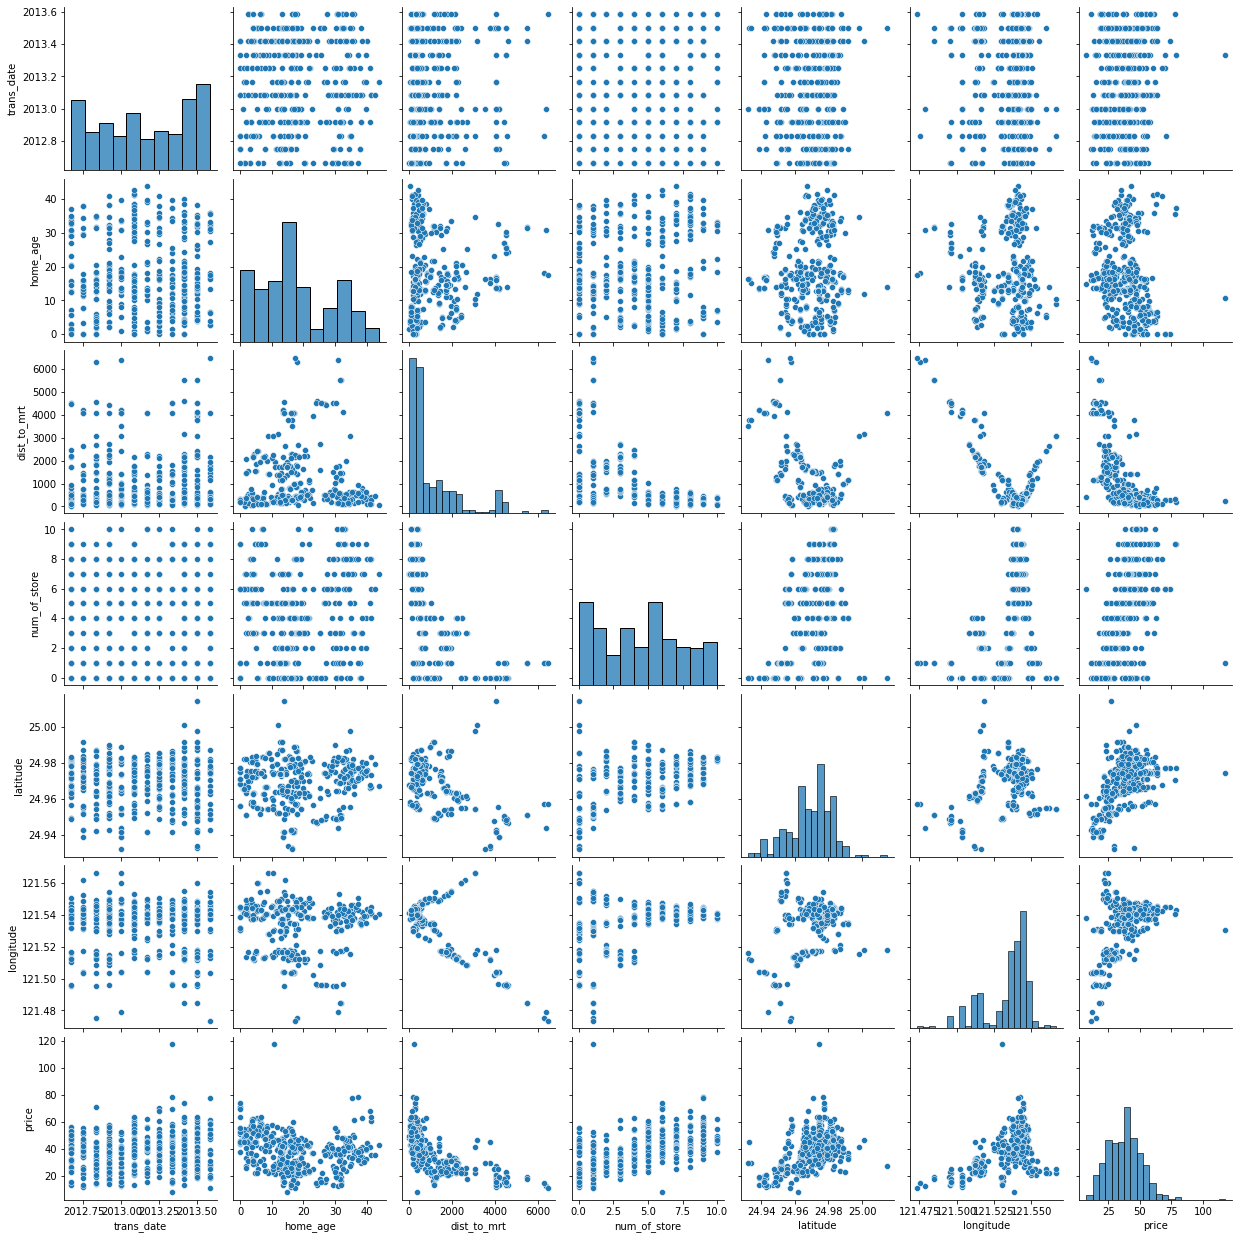

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

,trans_date,home_age,dist_to_mrt,num_of_store,latitude,longitude,price
trans_date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
home_age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
dist_to_mrt,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
num_of_store,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


그래프를 통해 확인한 결과, trans_date의 경우 범주를 나눠줄 수 있음을 알 수 있고, 나머지의 경우에는 수치형으로 표현될 수 있음을 알 수 있다. 어떻게 전처리를 할지 계획해보자.

In [23]:
df.isna().sum()

trans_date      0
home_age        0
dist_to_mrt     0
num_of_store    0
latitude        0
longitude       0
price           0
dtype: int64

운좋게도 결측치가 없으니 바로 표준화 및 스케일링에 들어간다.

In [10]:
def min_max_scaler(df):
  return (df - df.min())/(df.max() - df.min())

Home_age와 num_of_store의 경우는, min_max를 통해 scale할려고 한다.

In [11]:
# 혹시 모를 사고 대비, 원본 복사.
df_original = df.copy()

In [12]:
df['home_age'] = min_max_scaler(df.home_age)

In [13]:
df['num_of_store'] = min_max_scaler(df.num_of_store)

dist_to_mrt는 0에 가까운 값이 많으므로, 일단 로그 변환을 취하려고 한다.

In [14]:
df['dist_to_mrt'] = list(map(lambda x: np.log(x + df.dist_to_mrt.min()), df['dist_to_mrt']))

로그 변환이 잘 되었으므로, 이 변수를 다시 그려보려고 한다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


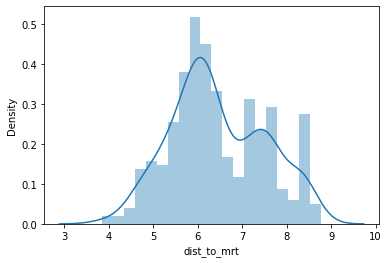

In [21]:
sns.distplot(df['dist_to_mrt'], bins = 20)

약간의 굴곡은 있으나, 나름 정규분포에 가까워 진거 같다.
정규성 검증을 통해 이를 정확하게 확인해 볼 수 있을 것이다.

dist_to_mrt, longitute, latitude는 정규화 예정이므로, 정규분포에 가까운지 확인해야 한다.

In [15]:
def standard_scaler(df):
  return (df - df.mean())/(df.std())

In [16]:
df['dist_to_mrt'] = standard_scaler(df.dist_to_mrt)
df['longitude'] = standard_scaler(df.longitude)
df['latitude'] = standard_scaler(df.latitude)

In [17]:
df

,trans_date,home_age,dist_to_mrt,num_of_store,latitude,longitude,price
0,2012.917,0.730594,-1.676101,1.0,1.124070,0.448220,37.9
1,2012.917,0.445205,-0.622194,0.9,0.911342,0.400654,42.2
2,2013.583,0.303653,-0.080130,0.5,1.485063,0.687352,47.3
3,2013.500,0.303653,-0.080130,0.5,1.485063,0.687352,54.8
4,2012.833,0.114155,-0.407791,0.5,0.833180,0.592220,43.1
...,...,...,...,...,...,...,...
409,2013.000,0.312785,1.761833,0.0,-2.214314,-1.925506,15.4
410,2012.667,0.127854,-1.628597,0.9,0.427062,0.634573,50.0
411,2013.250,0.429224,-0.406875,0.7,0.821899,0.423460,40.6
412,2013.000,0.184932,-1.516299,0.5,-0.184532,0.476238,52.5


이제 이를 바탕으로 우선 회귀를 구하려고 한다.
한가지 궁금한 것은 마지막 거래일자가 정말 영향이 있을지 궁금하다.
그래서 마지막 거래 일자를 제외하고 우선 회귀를 실시하려고 한다.
회귀 표를 얻어내기 위해 sklearn이 아닌 다른 방식을 적용하자.

In [20]:
# Case 1. trans_data 미고려 데이터
import statsmodels.api as sm
from sklearn.datasets import make_regression

df_X = df.loc[:,["home_age", "dist_to_mrt", "num_of_store", 
                            "latitude", "longitude"]]
df_y = df.loc[:, "price"]

df_X = sm.add_constant(df_X)
model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.80e-87
Time:                        04:51:31   Log-Likelihood:                -1457.9
No. Observations:                 414   AIC:                             2928.
Df Residuals:                     408   BIC:                             2952.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.3803      1.047     38.571   

R^2가 0.637로 생각보다 낮다는 것을 알수 있다.
또한, 유의수준 0.05하에서 longtiude는 유의하지 않다.
따라서 이를 제외하고 결과를 정리하면 다음과 같다.

In [21]:
# Case 1. trans_data 미고려 데이터
import statsmodels.api as sm
from sklearn.datasets import make_regression

df_X2 = df.loc[:,["home_age", "dist_to_mrt", "num_of_store", 
                            "latitude"]]
df_y = df.loc[:, "price"]

df_X2 = sm.add_constant(df_X2)
model = sm.OLS(df_y, df_X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.30e-88
Time:                        04:53:17   Log-Likelihood:                -1457.9
No. Observations:                 414   AIC:                             2926.
Df Residuals:                     409   BIC:                             2946.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.3914      1.045     38.664   

이제 구매 시점 또한 고려한 모델을 비교하려고 한다.
하지만 이를 위해서는 범주형 처리를 해야 할 것이다.
one-hot-encoding을 통해 이를 조정하자.

In [22]:
df

,trans_date,home_age,dist_to_mrt,num_of_store,latitude,longitude,price
0,2012.917,0.730594,-1.676101,1.0,1.124070,0.448220,37.9
1,2012.917,0.445205,-0.622194,0.9,0.911342,0.400654,42.2
2,2013.583,0.303653,-0.080130,0.5,1.485063,0.687352,47.3
3,2013.500,0.303653,-0.080130,0.5,1.485063,0.687352,54.8
4,2012.833,0.114155,-0.407791,0.5,0.833180,0.592220,43.1
...,...,...,...,...,...,...,...
409,2013.000,0.312785,1.761833,0.0,-2.214314,-1.925506,15.4
410,2012.667,0.127854,-1.628597,0.9,0.427062,0.634573,50.0
411,2013.250,0.429224,-0.406875,0.7,0.821899,0.423460,40.6
412,2013.000,0.184932,-1.516299,0.5,-0.184532,0.476238,52.5


In [28]:
df.astype({'trans_date':'str'})
df = pd.get_dummies(df, columns = ['trans_date'])

In [29]:
df

,home_age,dist_to_mrt,num_of_store,latitude,longitude,price,trans_date_2012.6670000000001,trans_date_2012.75,trans_date_2012.8329999999999,trans_date_2012.9170000000001,trans_date_2013.0,trans_date_2013.0829999999999,trans_date_2013.1670000000001,trans_date_2013.25,trans_date_2013.3329999999999,trans_date_2013.4170000000001,trans_date_2013.5,trans_date_2013.5829999999999
0,0.730594,-1.676101,1.0,1.124070,0.448220,37.9,0,0,0,1,0,0,0,0,0,0,0,0
1,0.445205,-0.622194,0.9,0.911342,0.400654,42.2,0,0,0,1,0,0,0,0,0,0,0,0
2,0.303653,-0.080130,0.5,1.485063,0.687352,47.3,0,0,0,0,0,0,0,0,0,0,0,1
3,0.303653,-0.080130,0.5,1.485063,0.687352,54.8,0,0,0,0,0,0,0,0,0,0,1,0
4,0.114155,-0.407791,0.5,0.833180,0.592220,43.1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,0.312785,1.761833,0.0,-2.214314,-1.925506,15.4,0,0,0,0,1,0,0,0,0,0,0,0
410,0.127854,-1.628597,0.9,0.427062,0.634573,50.0,1,0,0,0,0,0,0,0,0,0,0,0
411,0.429224,-0.406875,0.7,0.821899,0.423460,40.6,0,0,0,0,0,0,0,1,0,0,0,0
412,0.184932,-1.516299,0.5,-0.184532,0.476238,52.5,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
df.columns = ['home_age', 'dist_to_mrt', 'num_of_store', 'latitude', 'longitude', 'price',
                  't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12']
df.head()

,home_age,dist_to_mrt,num_of_store,latitude,longitude,price,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
0,0.730594,-1.676101,1.0,1.124070,0.448220,37.9,0,0,0,1,0,0,0,0,0,0,0,0
1,0.445205,-0.622194,0.9,0.911342,0.400654,42.2,0,0,0,1,0,0,0,0,0,0,0,0
2,0.303653,-0.080130,0.5,1.485063,0.687352,47.3,0,0,0,0,0,0,0,0,0,0,0,1
3,0.303653,-0.080130,0.5,1.485063,0.687352,54.8,0,0,0,0,0,0,0,0,0,0,1,0
4,0.114155,-0.407791,0.5,0.833180,0.592220,43.1,0,0,1,0,0,0,0,0,0,0,0,0


singular 문제를 제외하기 위해, 임의로 t12 변수는 제외하고 최종 모델을 확인.

In [37]:
# Case 2. trans_data 고려 데이터

df_X2 = df.loc[:,["home_age", "dist_to_mrt", "num_of_store", 
                            "latitude", "longitude",
                  't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12']]
df_y = df.loc[:, "price"]

df_X2 = sm.add_constant(df_X2)
model = sm.OLS(df_y, df_X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     48.63
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           4.40e-83
Time:                        05:12:29   Log-Likelihood:                -1443.1
No. Observations:                 414   AIC:                             2920.
Df Residuals:                     397   BIC:                             2989.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.4326      0.966     38.752   

multilinear 문제 발생 이유는 one-hot-encoding에서 나오는 모든 변수를 써서이다.
(1개의 변수는 제외해야 한다)
 6, 7, 8, 9, 10, 11, 12번과 longitude를 제외한 상황을 다시 보자.

In [43]:
# Case 2. trans_data 고려 데이터

df_X2 = df.loc[:,["home_age", "dist_to_mrt", "num_of_store", 
                            "latitude",
                't6', 't7', 't8', 't9', 't10', 't11', 't12']]
df_y = df.loc[:, "price"]

df_X2 = sm.add_constant(df_X2)
model = sm.OLS(df_y, df_X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     71.41
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           2.06e-87
Time:                        05:15:38   Log-Likelihood:                -1443.5
No. Observations:                 414   AIC:                             2911.
Df Residuals:                     402   BIC:                             2959.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           38.4051      1.118     34.363   

다른 떠오르는 방법은 분기별 기준으로 합치는거다.

In [35]:
df['q1'] = df.t1+df.t2
df['q2'] = df.t3+df.t4+df.t5
df['q3'] = df.t6+df.t7+df.t8
df['q4'] = df.t9+df.t10+df.t11
df['q5'] = df.t12

In [36]:
# Case 2_1. trans_data 고려 데이터 + 분기

df_X2 = df.loc[:,["home_age", "dist_to_mrt", "num_of_store", 
                            "latitude", "longitude",
                  'q1', 'q2', 'q3', 'q4']]
df_y = df.loc[:, "price"]

df_X2 = sm.add_constant(df_X2)
model = sm.OLS(df_y, df_X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     85.48
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           7.07e-88
Time:                        05:11:39   Log-Likelihood:                -1447.0
No. Observations:                 414   AIC:                             2914.
Df Residuals:                     404   BIC:                             2954.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.3031      2.004     22.104   

임의의 기준으로 합쳐서인지, 상대적으로 더 낮은 결과를 보이고 있다.

const를 제외한 결과랑 비교해볼 수 있을 것이다.
(const가 없을때의 결과가 더 좋을 수 있음)

In [45]:
# Case 2 - 2. trans_data 고려 데이터, 상수항 없앰

df_X2 = df.loc[:,["home_age", "dist_to_mrt", "num_of_store", 
                            "latitude", "longitude",
                  't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12']]
df_y = df.loc[:, "price"]

model = sm.OLS(df_y, df_X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     48.63
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           4.40e-83
Time:                        05:16:43   Log-Likelihood:                -1443.1
No. Observations:                 414   AIC:                             2920.
Df Residuals:                     397   BIC:                             2989.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
home_age       -10.4609      1.575     -6.641   

위와 큰 차이는 보이지 않고 있으나, 유의미하게 얻어낼 수 있는 사실은
- 구입 년도가 가격에 유의미하게 영향을 준다.
- 집의 longitude는 가격 설정에 유의미하다고 볼 수 없다.
- 집의 연식이 오래되지 않았을수록, 전철과의 거리가 가까울수록 집값이 비싸다.

우리가 생각하고 있던 사실을 확인할 수 있다. R^2 값 자체는 아쉽지만.